# **CREDIT FRAUD DETECTION**

By: Alfa Isa Dewa

# **Business Understanding**

**Context**

The company is a credit service provider, offering loans and credit lines to individuals. The business focuses on assessing the creditworthiness of applicants to determine the risk of loan defaults. The company uses data on the applicants' personal, financial, and historical credit behaviors to make informed decisions about whether to approve or deny loan applications. The primary goal is to minimize financial losses by ensuring that loans are granted to individuals who are likely to repay, while also maximizing the approval rate for creditworthy applicants.

**Problem Statement**

The company faces the challenge of accurately predicting the likelihood that an applicant will default on a loan. Given the large volume of applicants and the limited resources to manually verify each case, an automated system that can predict credit default risk is crucial. `The main problem lies in building a reliable predictive model that can identify high-risk applicants without unfairly denying loans to those who are capable of repaying.` False negatives (missing defaulters) are particularly costly, as they result in issuing loans to individuals who are unlikely to repay.

**Goals**

- Predict Loan Defaults: Build a predictive model that accurately identifies whether an applicant is at risk of defaulting on a loan.
- Minimize Defaults: Reduce the number of high-risk customers granted loans, thereby minimizing the company’s exposure to financial losses.
- Optimize Loan Approval: Maximize the number of good applicants approved for loans while minimizing the number of creditworthy applicants who are unfairly denied.
- Automate the Approval Process: Develop an automated, data-driven solution for loan approval, improving efficiency and reducing operational costs.

**Metrics**

In the context of a credit company:
- True Positives (TP): Correctly predicted defaulters (model flags high-risk applicants who do default).
- False Positives (FP): Incorrectly predicted defaulters (model wrongly flags safe applicants as defaulters, leading to loan denial).
- True Negatives (TN): Correctly predicted non-defaulters (model identifies safe applicants who do not default).
- False Negatives (FN): Incorrectly predicted non-defaulters (model misses high-risk applicants who do default, leading to financial losses).

*Key Focus:*
- Minimize False Negatives (FN) to avoid granting loans to defaulters.
- Control False Positives (FP) to avoid denying creditworthy applicants.

*Conclusions*:
`RECALL` should be `prioritized` because:

- Recall measures how well the model identifies actual defaulters (True Positives), and it helps to minimize False Negatives (FN), which is crucial in a credit company.

By focusing on recall, you ensure that as many defaulters as possible are flagged, reducing the risk of granting loans to high-risk applicants who will default.

In short, high recall minimizes financial losses from False Negatives, making it the key metric to prioritize.

## **Data Understanding**

In [3]:
#Modul Utama
import pandas as pd
import numpy as np

#Modul Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### **application_record.csv**

In [4]:
df_applicant = pd.read_csv('application_record.csv')
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
len(df_applicant)

438557

Features Explanation for `application_record.csv`

| **Feature**                 | **Description**                                                                 |
|-----------------------------|---------------------------------------------------------------------------------|
| **ID**                       | Unique identifier for each applicant.                                           |
| **CODE_GENDER**              | Gender of the applicant. M = Male, F = Female.                                  |
| **FLAG_OWN_CAR**             | Whether the applicant owns a car. Y = Yes, N = No.                              |
| **FLAG_OWN_REALTY**          | Whether the applicant owns real estate. Y = Yes, N = No.                        |
| **CNT_CHILDREN**             | Number of children the applicant has.                                           |
| **AMT_INCOME_TOTAL**         | Total annual income of the applicant (in monetary units).                       |
| **NAME_INCOME_TYPE**         | Type of income the applicant receives. e.g., Working, Commercial associate, etc. |
| **NAME_EDUCATION_TYPE**      | The applicant’s education level (e.g., Higher education, Secondary, etc.).       |
| **NAME_FAMILY_STATUS**       | The applicant's family status (e.g., Civil marriage, Single, etc.).             |
| **NAME_HOUSING_TYPE**        | The type of housing the applicant lives in (e.g., Rented apartment, House, etc.).|
| **DAYS_BIRTH**               | Age of the applicant in days (negative value).                                 |
| **DAYS_EMPLOYED**            | Number of days the applicant has been employed (negative for current employment). |
| **FLAG_MOBIL**               | Whether the applicant has a mobile phone. 1 = Yes, 0 = No.                      |
| **FLAG_WORK_PHONE**          | Whether the applicant has a work phone. 1 = Yes, 0 = No.                        |
| **FLAG_PHONE**               | Whether the applicant has a phone. 1 = Yes, 0 = No.                             |
| **FLAG_EMAIL**               | Whether the applicant has an email address. 1 = Yes, 0 = No.                    |
| **OCCUPATION_TYPE**          | The occupation of the applicant (e.g., Sales staff, Security staff, etc.).       |
| **CNT_FAM_MEMBERS**          | The number of family members in the applicant's household.                      |


1. The application_record.csv dataset is about loan applicants and contains detailed information about each individual's personal, financial, and demographic characteristics. The dataset is used to evaluate the applicant's eligibility for a loan and to assess the creditworthiness of individuals applying for loans.

2. The total records here is 438557
3. Has 18 features

In [6]:
df_applicant.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


### **credit_record.csv**

In [7]:
df_credit = pd.read_csv('credit_record.csv')
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
len(df_credit)

1048575

Features Explanation for `credit_record.csv`

| **Feature**           | **Description**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| **ID**                | Unique identifier for each applicant.                                           |
| **MONTHS_BALANCE**    | The month of the record. 0 represents the most recent month, negative values represent past months (e.g., -1, -2). |
| **STATUS**            | The credit status of the applicant in that month:
                            - '0' = No DPD (Days Past Due)
                            - '1' = DPD (1-30 days past due)
                            - '2' = DPD (31-60 days past due)
                            - '3' = DPD (61-90 days past due)
                            - '4' = DPD (91+ days past due)
                            - '5' = No loan (inactive loan)
                            - 'C' = Closed (loan has been closed)
                            - 'X' = No loan record (no loan activity for the month) |

The credit_record.csv dataset tracks the credit history of loan applicants over time. It includes:

1. Monthly Loan Status: For each applicant, the dataset records their loan payment status for each month. The status is represented by a value indicating how many days past due (DPD) the applicant is or if the loan is closed or inactive.
2. Tracking Defaults: The dataset is useful for evaluating whether an applicant has defaulted on any loan payments, which is crucial for assessing creditworthiness.
3. Total records : 1048575
4. Total features : 3


In [9]:
df_credit.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


### **merge dataset**

we're gonna merge the dataset based on 'ID'.

In [10]:
# Merge application_record and credit_record datasets on ID
df = pd.merge(df_applicant, df_credit, on='ID', how='inner')

# Display first few rows of merged dataset
df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [11]:
def analyze_dataframe(df):
    # Create a dataframe with feature information
    # The first 'Feature' column shows the column names
    # The second 'Feature' in the output is from df.columns being used as the index
    feature_info = pd.DataFrame({
        'Feature': df.columns,  # This creates the first Feature column
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Missing Values (%)': round(df.isnull().sum() / len(df) * 100, 2),
        'Unique Values Count': df.nunique(),
        'Sample Unique Values': [list(df[col].unique())[:3] for col in df.columns]
    })
    
    # Reset the index to avoid having df.columns as index which creates second Feature column
    feature_info = feature_info.reset_index(drop=True)
    
    return feature_info

analyze_dataframe(df)


,Feature,Data Type,Missing Values,Missing Values (%),Unique Values Count,Sample Unique Values
0,ID,int64,0,0.00,36457,"[5008804, 5008805, 5008806]"
1,CODE_GENDER,object,0,0.00,2,"[M, F]"
2,FLAG_OWN_CAR,object,0,0.00,2,"[Y, N]"
3,FLAG_OWN_REALTY,object,0,0.00,2,"[Y, N]"
4,CNT_CHILDREN,int64,0,0.00,9,"[0, 1, 3]"
5,AMT_INCOME_TOTAL,float64,0,0.00,265,"[427500.0, 112500.0, 270000.0]"
6,NAME_INCOME_TYPE,object,0,0.00,5,"[Working, Commercial associate, Pensioner]"
7,NAME_EDUCATION_TYPE,object,0,0.00,5,"[Higher education, Secondary / secondary speci..."
8,NAME_FAMILY_STATUS,object,0,0.00,5,"[Civil marriage, Married, Single / not married]"
9,NAME_HOUSING_TYPE,object,0,0.00,6,"[Rented apartment, House / apartment, Municipa..."


In [12]:
len(df)

777715

- Total records after merged: 777715 records
- has 20 features
- thre's only 36457	distinct ID here, despite the total records is much higher

## **Data Cleaning / Preprocessing**

### Missing Value

we couldn't just fill the dataset with mode, furthermore, with that big of missing value, we can just remove OCCUPATION_TYPE rather than filling it with any data that could lead to bias result.

In [13]:
df = df.drop('OCCUPATION_TYPE', axis=1)

In [14]:
analyze_dataframe(df)

,Feature,Data Type,Missing Values,Missing Values (%),Unique Values Count,Sample Unique Values
0,ID,int64,0,0.0,36457,"[5008804, 5008805, 5008806]"
1,CODE_GENDER,object,0,0.0,2,"[M, F]"
2,FLAG_OWN_CAR,object,0,0.0,2,"[Y, N]"
3,FLAG_OWN_REALTY,object,0,0.0,2,"[Y, N]"
4,CNT_CHILDREN,int64,0,0.0,9,"[0, 1, 3]"
5,AMT_INCOME_TOTAL,float64,0,0.0,265,"[427500.0, 112500.0, 270000.0]"
6,NAME_INCOME_TYPE,object,0,0.0,5,"[Working, Commercial associate, Pensioner]"
7,NAME_EDUCATION_TYPE,object,0,0.0,5,"[Higher education, Secondary / secondary speci..."
8,NAME_FAMILY_STATUS,object,0,0.0,5,"[Civil marriage, Married, Single / not married]"
9,NAME_HOUSING_TYPE,object,0,0.0,6,"[Rented apartment, House / apartment, Municipa..."


### Duplicated data

In [15]:
# Check for duplicated rows
duplicates = df.duplicated()

# Print number of duplicated rows and percentage
print(f"Number of duplicated rows: {duplicates.sum()}")
print(f"Percentage of duplicated rows: {duplicates.sum()/len(df)*100:.2f}%")

# Display sample of duplicated rows if any exist
if duplicates.sum() > 0:
    print("\nSample of duplicated rows:")
    display(df[duplicates].head())


Number of duplicated rows: 0
Percentage of duplicated rows: 0.00%


this needs to go further checking for the unique id is so small compared to total records

In [16]:
# Get duplicated IDs
duplicated_ids = df[df.duplicated(subset=['ID'], keep=False)]['ID'].unique()

# Print number of duplicated IDs and percentage
print(f"Number of duplicated IDs: {len(duplicated_ids)}")
print(f"Percentage of duplicated IDs: {len(duplicated_ids)/df['ID'].nunique()*100:.2f}%")

# Display sample of duplicated IDs if any exist
if len(duplicated_ids) > 0:
    print("\nSample of duplicated IDs:")
    display(df[df['ID'].isin(duplicated_ids[:5])].sort_values('ID'))


Number of duplicated IDs: 36116
Percentage of duplicated IDs: 99.06%

Sample of duplicated IDs:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-22,X
67,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-23,X
68,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-24,X
69,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-25,X


this shows that month almost every ID has been duplicated due to `MONTH_BALANCE` from 0 to their latest. So this is not a problem at all.

### Renaming Column for better context

In [17]:
# renaming columns in a meaning full way

df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'

} , inplace=True)

df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status'],
      dtype='object')

### Outliers

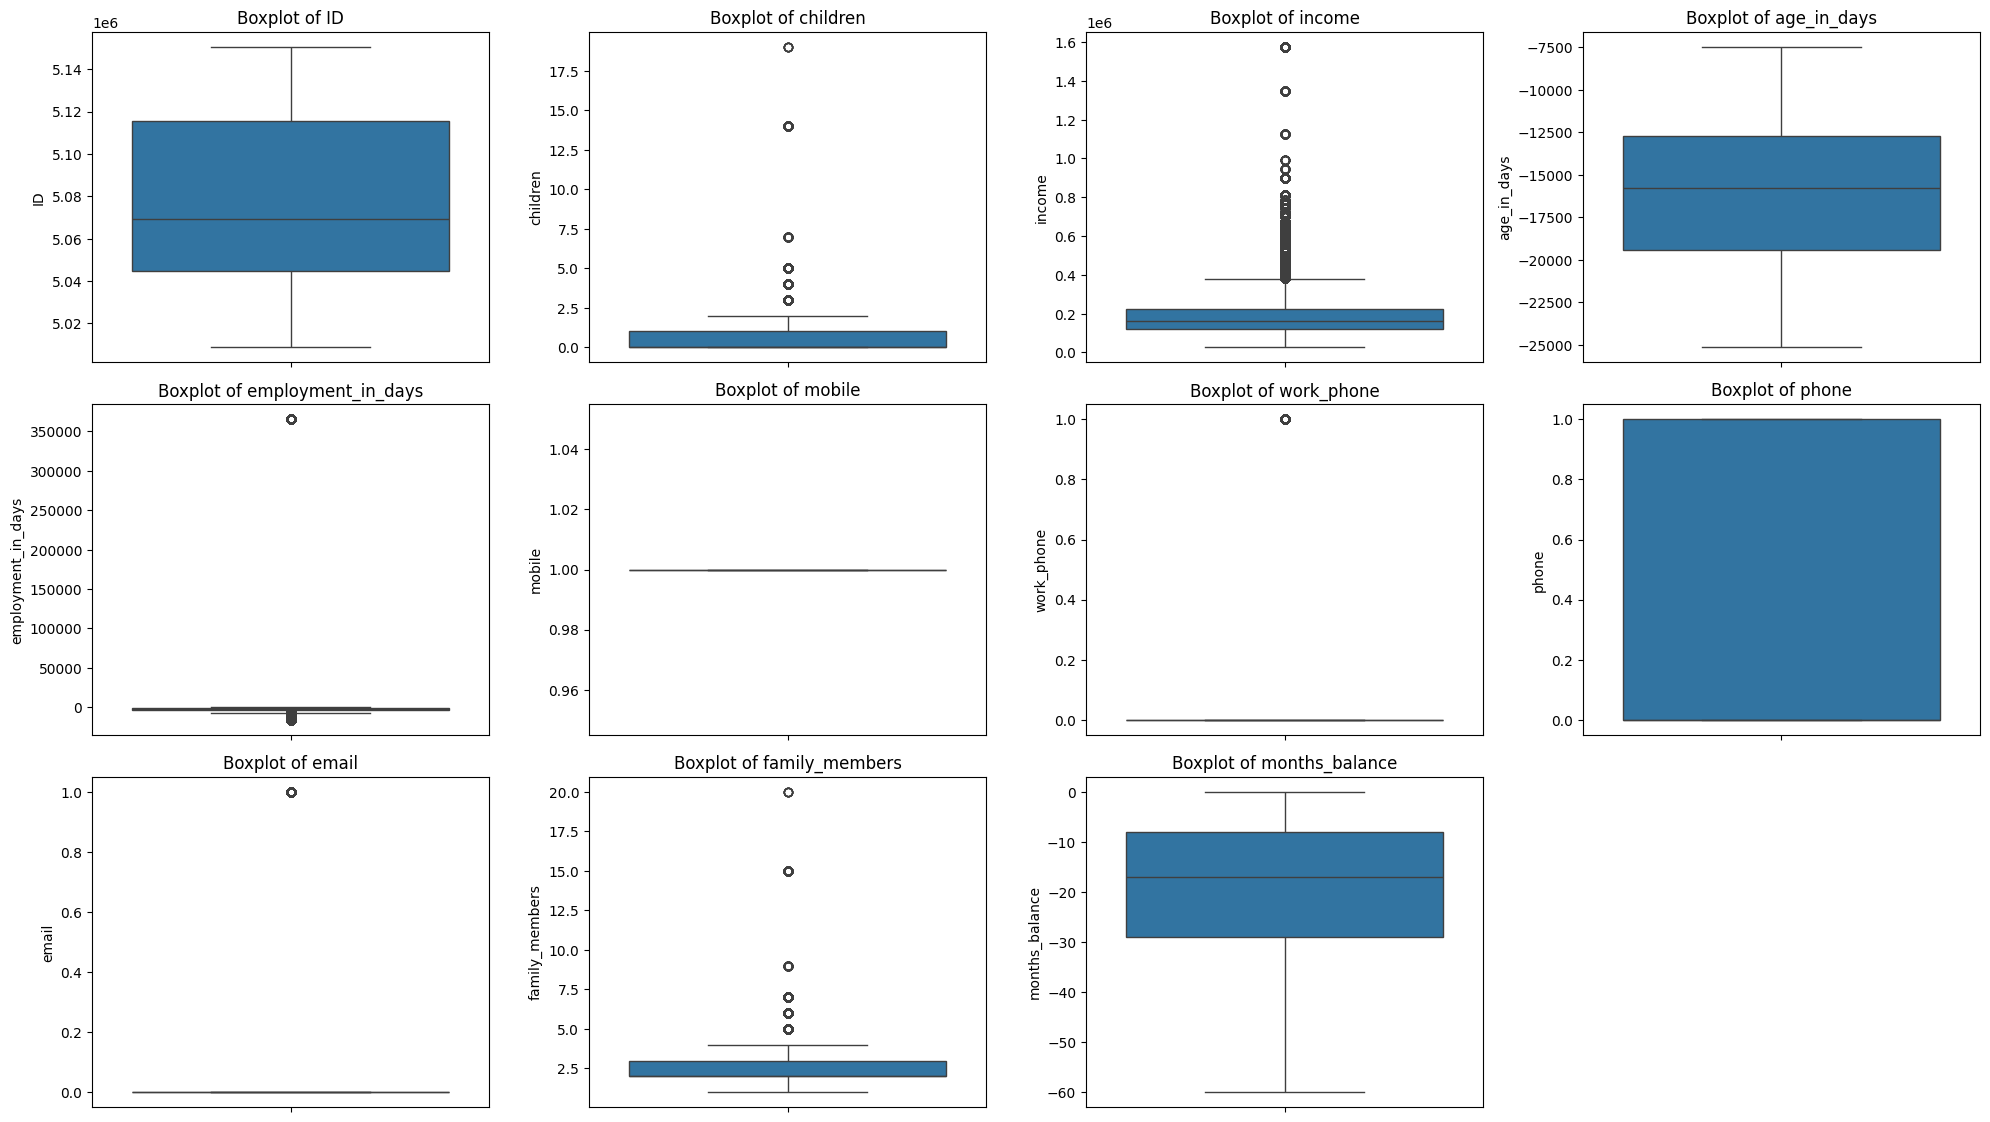

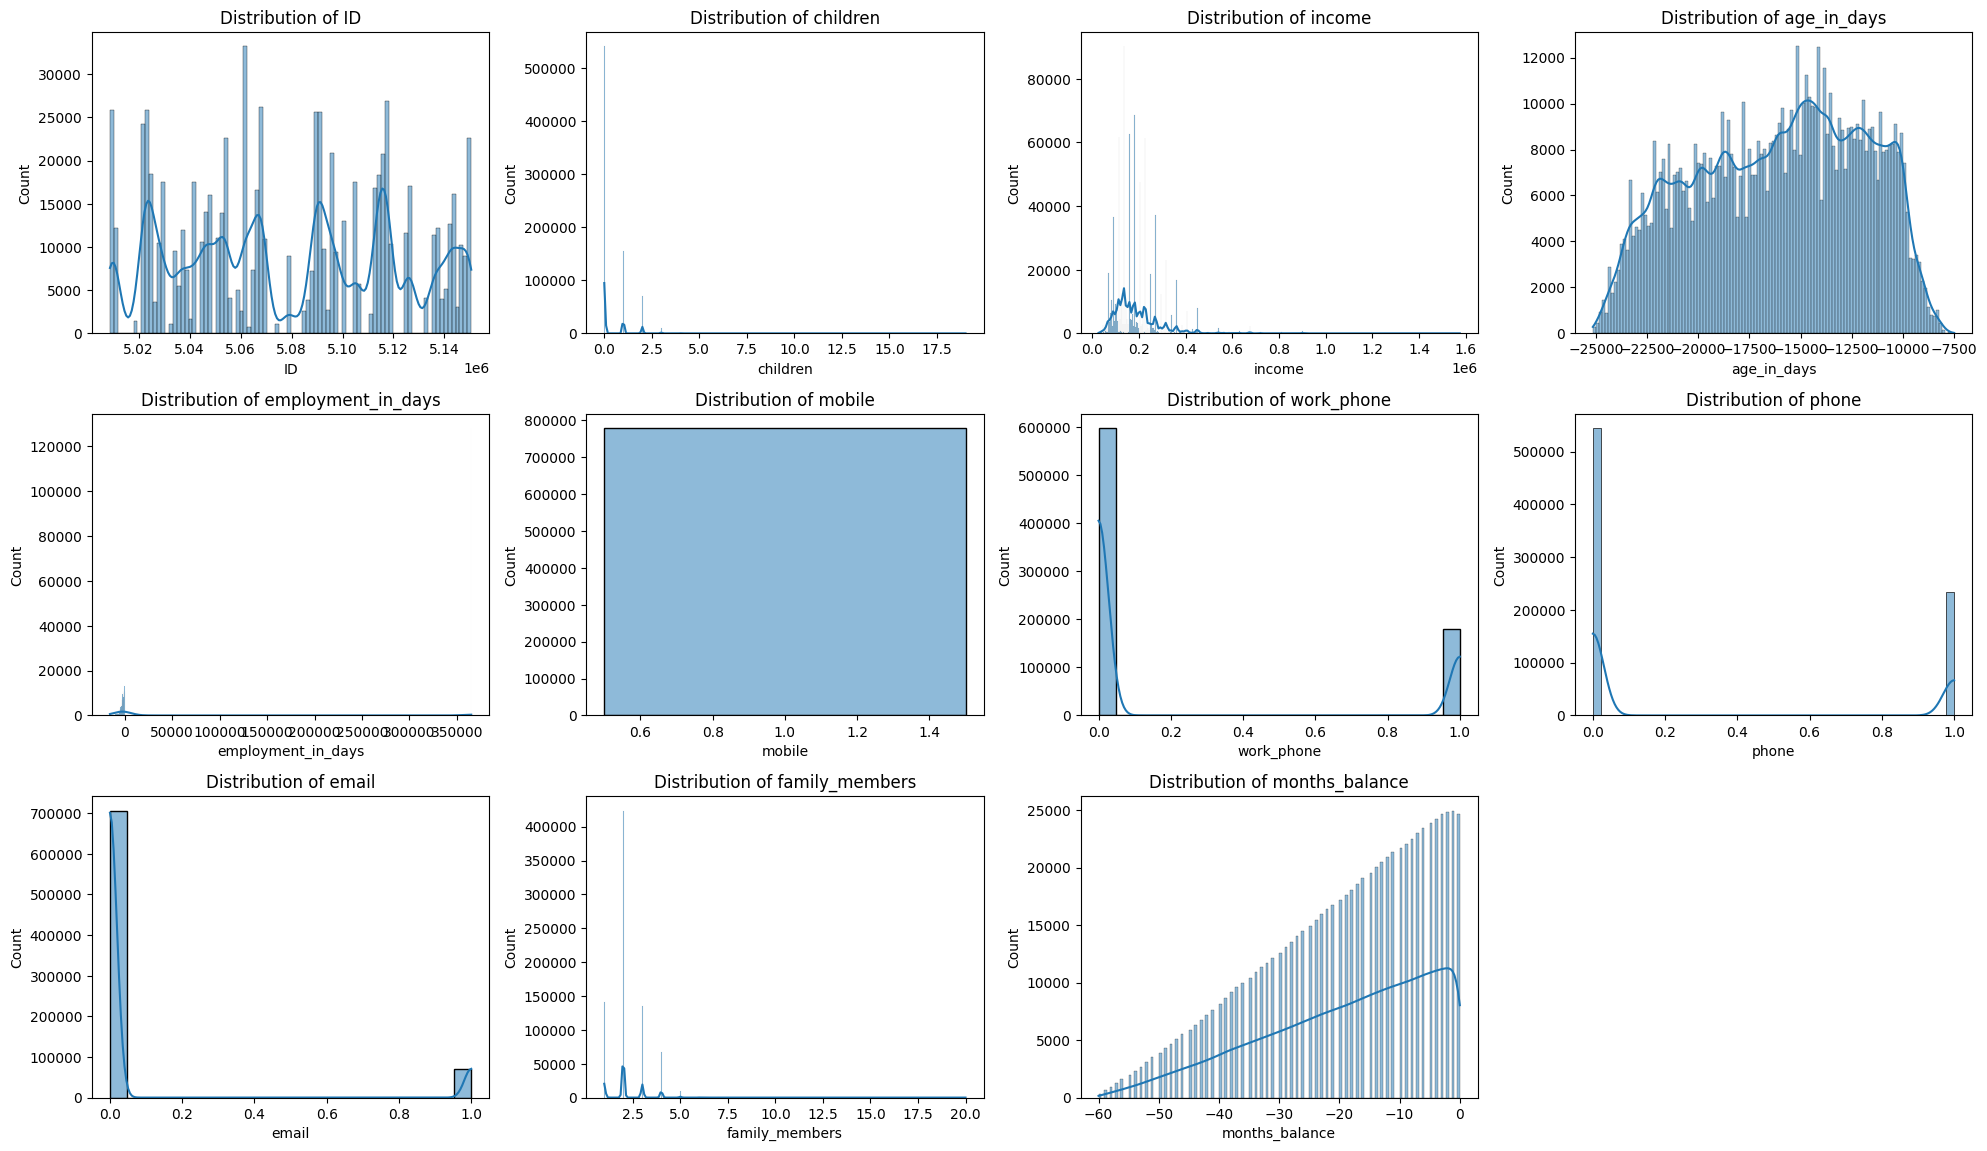


Outliers in ID:
Lower bound: 4938094.75, Upper bound: 5222024.75
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in children:
Lower bound: -1.5, Upper bound: 2.5
Number of outliers: 11039
Percentage of outliers: 1.42%

Outliers in income:
Lower bound: -33750.0, Upper bound: 380250.0
Number of outliers: 33987
Percentage of outliers: 4.37%

Outliers in age_in_days:
Lower bound: -29558.5, Upper bound: -2610.5
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in employment_in_days:
Lower bound: -7583.5, Upper bound: 3860.5
Number of outliers: 163348
Percentage of outliers: 21.00%

Outliers in mobile:
Lower bound: 1.0, Upper bound: 1.0
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in work_phone:
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 180288
Percentage of outliers: 23.18%

Outliers in phone:
Lower bound: -1.5, Upper bound: 2.5
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in email:
Lower bound: 0.0, Upper bound: 0.0
N

In [18]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Create subplots for histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Calculate IQR and identify outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'\nOutliers in {col}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers: {len(outliers)}')
    print(f'Percentage of outliers: {len(outliers)/len(df)*100:.2f}%')


we need to take a look at children, income, and family members

- Children:
    + Outliers: The children count typically ranges from 0 to a few (i.e., usually less than 10 these days). Any values beyond 10 are likely to be extreme but not necessarily erroneous.
    + We're going to cut all of them
- Income:
    + Outliers: Income values are often heavily skewed, and we can have extremely high incomes (as seen in the boxplot). These extreme values can disproportionately affect many models, especially linear models.
    + We're gonna cut all of them cause it's only 4.4%
- Family Members:
    + Outliers: Family size typically ranges from 1 to 10 members. Larger values are rare, but still possible. Outliers could reflect real, although rare, cases (e.g., large families).
    + we're gonna cut all of them because it's only 1.4%


In [19]:
# Cut all outliers for children using IQR
Q1_children = df['children'].quantile(0.25)
Q3_children = df['children'].quantile(0.75)
IQR_children = Q3_children - Q1_children
df = df[(df['children'] >= (Q1_children - 1.5 * IQR_children)) & 
        (df['children'] <= (Q3_children + 1.5 * IQR_children))]

# Cut outliers for income using IQR
Q1_income = df['income'].quantile(0.25)
Q3_income = df['income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
df = df[(df['income'] >= (Q1_income - 1.5 * IQR_income)) & 
        (df['income'] <= (Q3_income + 1.5 * IQR_income))]

# Cut outliers for family members using IQR
Q1_family = df['family_members'].quantile(0.25)
Q3_family = df['family_members'].quantile(0.75)
IQR_family = Q3_family - Q1_family
df = df[(df['family_members'] >= (Q1_family - 1.5 * IQR_family)) & 
        (df['family_members'] <= (Q3_family + 1.5 * IQR_family))]


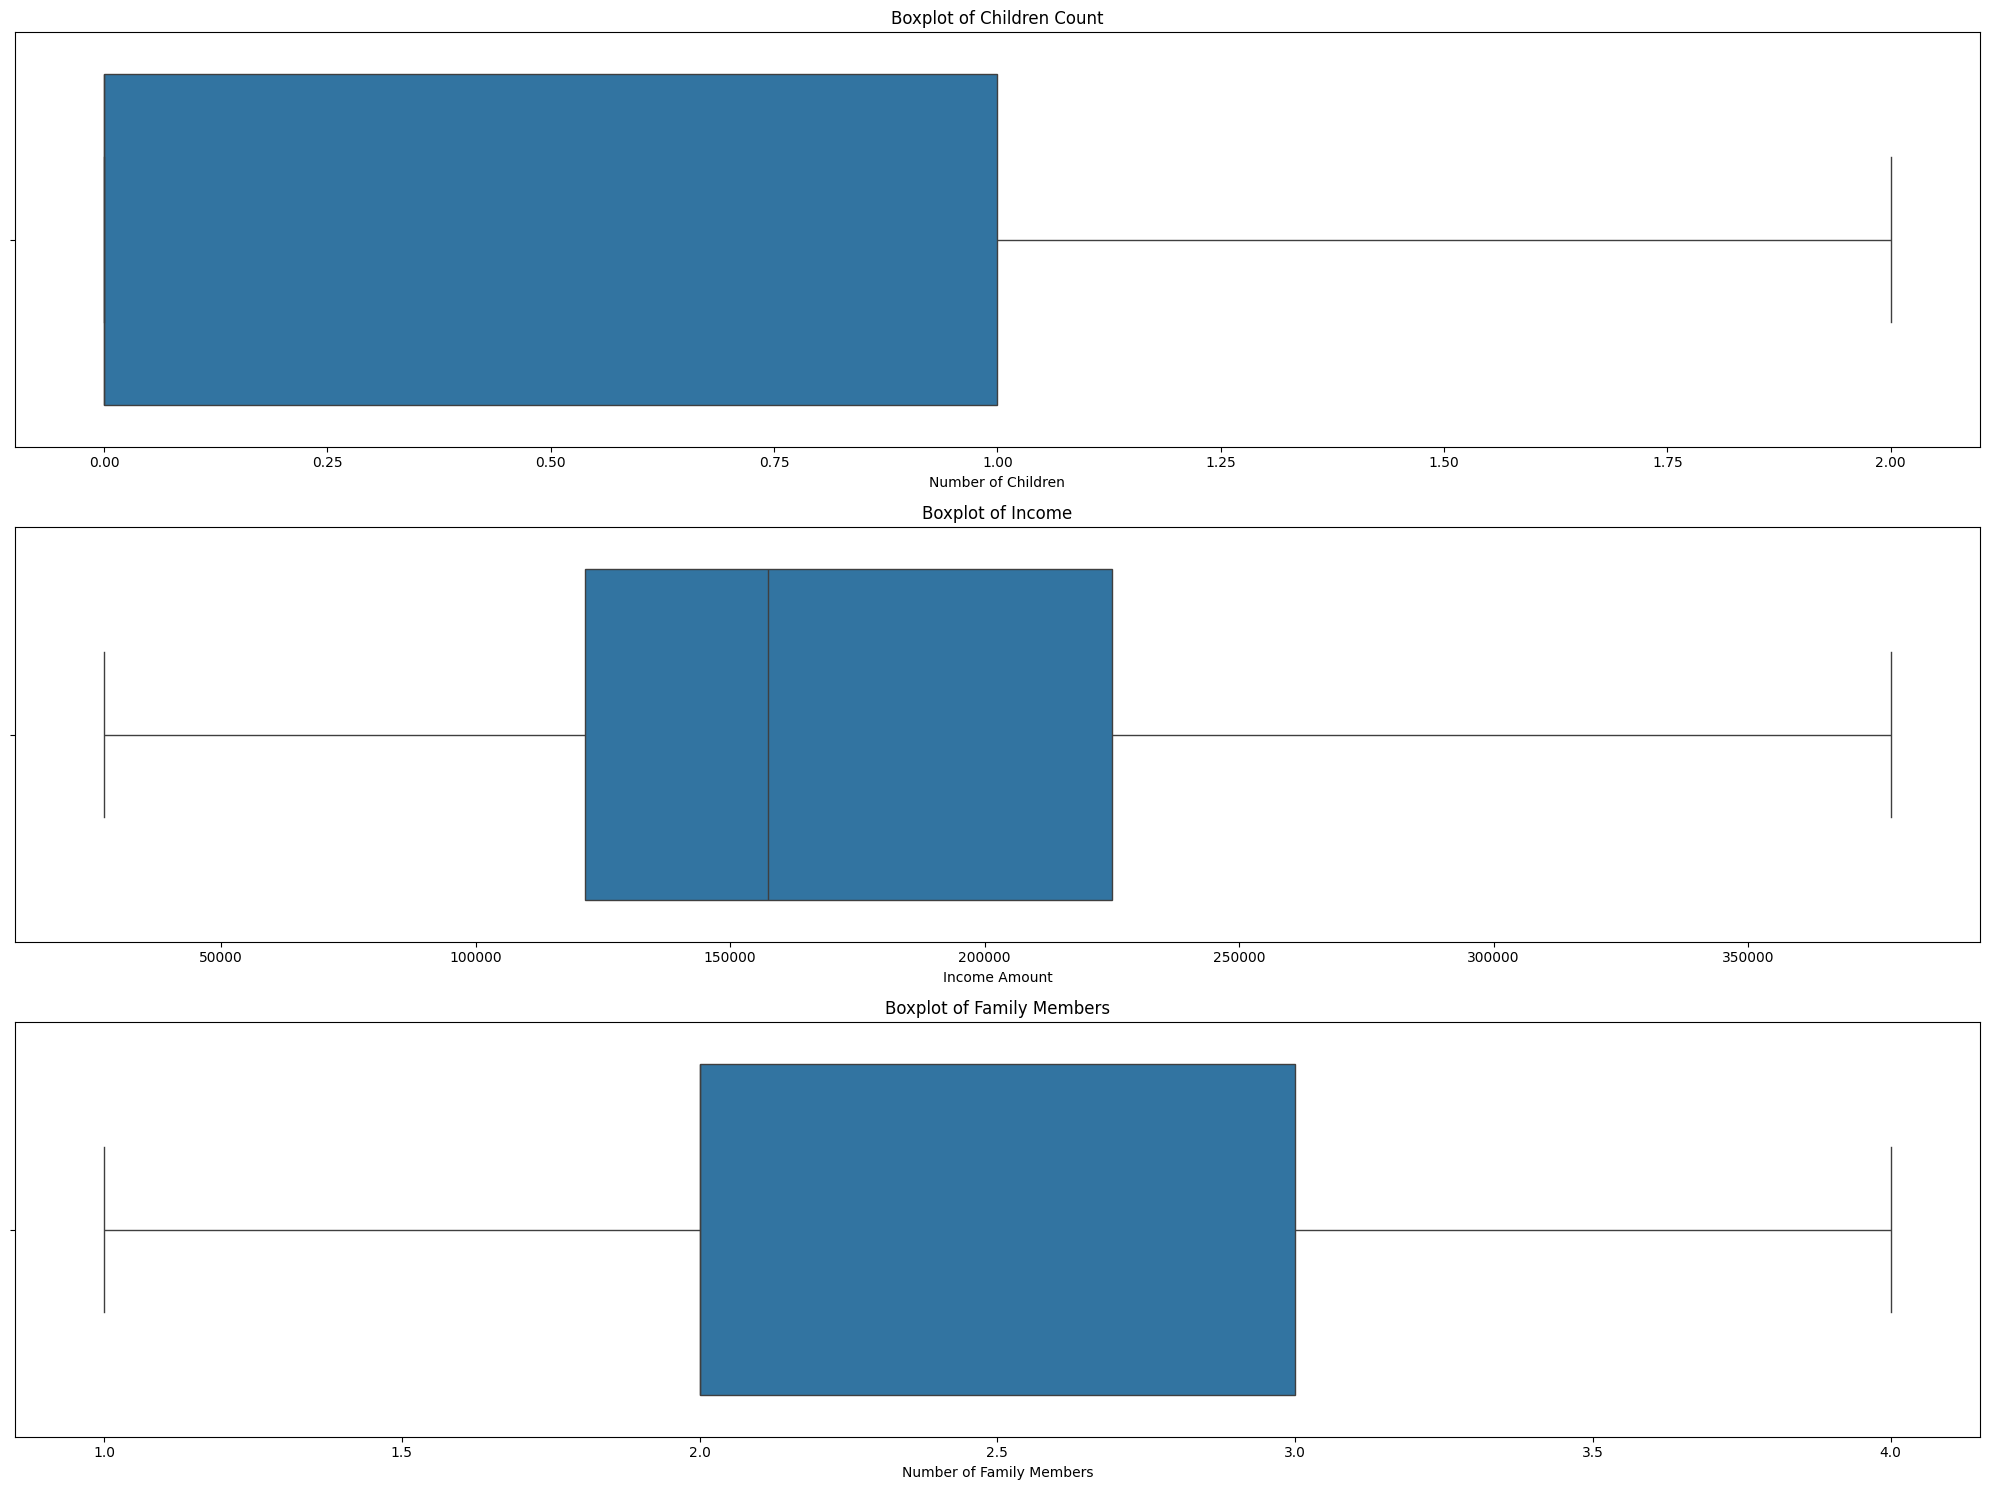

In [20]:
# Create subplots for boxplots
plt.figure(figsize=(20, 15))

# Boxplot for children
plt.subplot(3, 1, 1)
sns.boxplot(x=df['children'])
plt.title('Boxplot of Children Count')
plt.xlabel('Number of Children')

# Boxplot for income
plt.subplot(3, 1, 2)
sns.boxplot(x=df['income'])
plt.title('Boxplot of Income')
plt.xlabel('Income Amount')

# Boxplot for family members
plt.subplot(3, 1, 3)
sns.boxplot(x=df['family_members'])
plt.title('Boxplot of Family Members')
plt.xlabel('Number of Family Members')

plt.tight_layout()
plt.show()


Now it's safe to go to Feature Engineering

## **Feature Engineering**

### TARGET

we need to set our target, let's say, we can make our target named `loan_status` based on `status` featur, with these following rules:

- Each 'ID' keeps the latest month (max(MONTHS_BALANCE)).
- Each 'ID' keeps the worst (highest) status after transformation.
- If any month had 'X' or 'C' (converted to 1), the final status is 0 (Good Client).
- If the user had only overdue payments, the final status is 1 (Bad Client).

Basically, we are hunting the bad clients, if 'STATUS' >= 2 represents serious overdue payments, this transformation marks those customers with 1 (high risk). If 'STATUS' < 2 means acceptable risk or good clients, they are marked with 0.

In [21]:
# Create loan_status feature based on status rules
df['loan_status'] = df['status'].apply(lambda x: 0 if x in ['X', 'C'] else (1 if int(x) >= 2 else 0))

In [22]:
df.head()

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,C,0
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-1,C,0
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-2,C,0
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-3,C,0
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-4,C,0


### Multicolinearity

Why This Happens:

Feature Interdependence:
Features like children and family_members are closely related since a family member count would naturally include children. Therefore, they exhibit a high positive correlation.

Age and Employment:
As people age, they may retire or change jobs more frequently, resulting in a negative correlation between age and employment days. Younger individuals may still be in the early stages of their career.

Weak Correlation with Loan Status:
It’s not surprising that some of these features don’t show strong correlations with loan_status, as default behavior can be influenced by a variety of complex factors (e.g., credit history, loan type, or even spending behavior) that aren’t captured here.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop 'loan_status' and 'status' columns and select only numeric columns
col = df.select_dtypes(include=['int64', 'float64'])

# Compute variance inflation factor
factor = pd.DataFrame(columns=["VIF", "Features"])

# For each column, compute the VIF
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values.astype(float), i) for i in range(col.shape[1])]

# Display the results
factor

,VIF,Features
0,1.014011,ID
1,4.169133,children
2,1.054746,income
3,1.799119,age_in_days
4,1.720216,employment_in_days
5,15051.512639,mobile
6,1.214045,work_phone
7,1.117348,phone
8,1.024175,email
9,4.023506,family_members


we will not using `mobile`, `children`, and `family_members`, since it has high VIF score.

### Drop Unused Features

In [24]:
df = df.drop(columns=['mobile', 'children', 'family_members', 'ID', 'status'])

we're also dropping ID and Status because there's no power on those two features

### Encoding

In [25]:
analyze_dataframe(df)

,Feature,Data Type,Missing Values,Missing Values (%),Unique Values Count,Sample Unique Values
0,gender,object,0,0.0,2,"[M, F]"
1,own_car,object,0,0.0,2,"[Y, N]"
2,own_property,object,0,0.0,2,"[Y, N]"
3,income,float64,0,0.0,216,"[112500.0, 270000.0, 283500.0]"
4,income_type,object,0,0.0,5,"[Working, Commercial associate, Pensioner]"
5,education,object,0,0.0,5,"[Secondary / secondary special, Higher educati..."
6,family_status,object,0,0.0,5,"[Married, Single / not married, Separated]"
7,housing_type,object,0,0.0,6,"[House / apartment, Rented apartment, Municipa..."
8,age_in_days,int64,0,0.0,6929,"[-21474, -19110, -22464]"
9,employment_in_days,int64,0,0.0,3518,"[-1134, -3051, 365243]"


In [26]:
df['education'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

from the information above, now we will group based on their similarity:
- Numeric Features : `income`, `age_in_days`, and `employment_in_days`
- Binary : `housing_type`,`income_type`,`family_status`, `housing_type`
- Ordinal : `education`
    + 'Lower secondary': 1
    + 'Secondary / secondary special': 2
    + 'Incomplete higher': 3
    + 'Higher education': 4
    + 'Academic degree': 5
- OH : `gender`, `own_car`, `own_property`,  `work_phone`, `phone`, `email`, `months_balance`

we're not gonna use `status` since, we change the target into loan_status

In [27]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Create transformers for each feature type
numeric_features = ['income', 'age_in_days', 'employment_in_days']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

binary_features = ['housing_type', 'income_type', 'family_status']
binary_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

ordinal_features = ['education']
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['Lower secondary', 
                                          'Secondary / secondary special', 
                                          'Incomplete higher', 
                                          'Higher education', 
                                          'Academic degree']]))
])

oh_features = ['gender', 'own_car', 'own_property', 'work_phone', 'phone', 'email', 'months_balance']
oh_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('oh', oh_transformer, oh_features)
    ],remainder='passthrough')

preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['income', 'age_in_days',
                                  'employment_in_days']),
                                ('bin',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['housing_type', 'income_type',
                                  'family_status']),
                                ('ord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Lower '
                                                                              'secondary',
                                                                              'Secondary '
                                                                              '/ '
                                                                              'secondary '
                                                                              'special',
                                                                              'Incomplete '
                                                                              'higher',
                                                                              'Higher '
                                                                              'education',
                                                                              'Academic '
                                                                              'degree']]))]),
                                 ['education']),
                                ('oh',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'own_car', 'own_property',
                                  'work_phone', 'phone', 'email',
                                  'months_balance'])])

## **Model Building**

In [28]:
x = df.drop(columns=['loan_status'])
y = df['loan_status']

In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2, 
    random_state=2021, 
    stratify=y
)

# Print shapes to verify split
print(f"Training features shape: {x_train.shape}")
print(f"Test features shape: {x_test.shape}")
print(f"Training target shape: {y_train.shape}") 
print(f"Test target shape: {y_test.shape}")

Training features shape: (586777, 14)
Test features shape: (146695, 14)
Training target shape: (586777,)
Test target shape: (146695,)


But before go deeper, we need to take a look at the target, is it imbalance or not

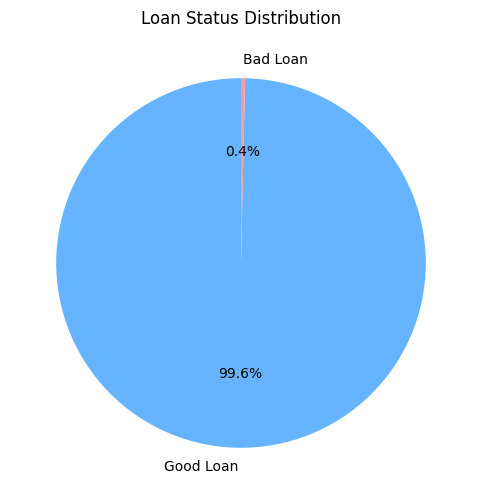

In [30]:
# Plot pie chart of loan status distribution
plt.figure(figsize=(6,6))
df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', 
                                        startangle=90,
                                        labels=['Good Loan', 'Bad Loan'],
                                        colors=['#66b3ff','#ff9999'])
plt.title('Loan Status Distribution')
plt.ylabel('')
plt.show()


This is so imbalance, we need to take care of this

In [56]:
# Implementasi Oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

ros = RandomOverSampler()
adasyn = ADASYN()
smote = SMOTE()
bsmote = BorderlineSMOTE()
kmean = KMeansSMOTE()
svm = SVMSMOTE()

oversm = [ros, adasyn, smote, bsmote, kmean, svm]

# Implementasi Undersampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour

rus = RandomUnderSampler()
nm = NearMiss()
cnn = CondensedNearestNeighbour()

undersm = [rus, nm, cnn]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Initialize models
models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [58]:
# BEFORE SAMPLING

# Import required libraries
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_validate

# Initialize dictionary to store evaluation results
results = {}

# Define scoring metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score, greater_is_better=True),
    'Precision': make_scorer(precision_score, greater_is_better=True),
    'Recall': make_scorer(recall_score, greater_is_better=True),
    'F2 Score': make_scorer(fbeta_score, beta=2, greater_is_better=True)
}

# Evaluate each model using cross-validation
for name, model in models.items():
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Perform 5-fold cross-validation
    cv_results = cross_validate(
        pipeline,
        x_train,
        y_train,
        cv=5,
        scoring=scoring,
        return_train_score=True
    )
    
    # Store results for current model
    results[name] = cv_results

[LightGBM] [Info] Number of positive: 1654, number of negative: 467767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 469421, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003523 -> initscore=-5.644774
[LightGBM] [Info] Start training from score -5.644774
[LightGBM] [Info] Number of positive: 1654, number of negative: 467767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 469421, number of used features: 93
[LightGBM] [Info] 

In [61]:
# Evaluasi hasil
evaluation_results = {}

for model_name, result in results.items():
    evaluation_results[model_name] = {
        'mean_accuracy' : np.mean(result['test_Accuracy']*100),
        'mean_precision': np.mean(result['test_Precision']*100),
        'mean_train_recall': np.mean(result['train_Recall']*100),
        'mean_test_recall': np.mean(result['test_Recall']*100),
        'mean_train_F2' : np.mean(result['train_F2 Score']*100),
        'mean_f2_score': np.mean(result['test_F2 Score']*100),
    }

hasiltest = pd.DataFrame(evaluation_results).T
hasiltest.sort_values(by=['mean_train_recall'], ascending=False)

,mean_accuracy,mean_precision,mean_train_recall,mean_test_recall,mean_train_F2,mean_f2_score
Decision Tree,99.592690,37.042713,56.104889,21.952954,61.232653,23.887079
XGBoost,99.683355,72.298956,19.040057,16.489104,22.481030,19.495156
LightGBM,99.610073,37.126768,17.105674,14.459768,19.541058,16.414690
AdaBoost,99.647566,0.000000,0.000000,0.000000,0.000000,0.000000
Logistic Regression,99.647566,0.000000,0.000000,0.000000,0.000000,0.000000


SAMPLING

In [63]:
# Hasil evaluasi - sesudah sampling
results = {}

scoring = {
    'Accuracy': make_scorer(accuracy_score, greater_is_better=True),
    'precision': make_scorer(precision_score, greater_is_better=True),
    'Recall': make_scorer(recall_score, greater_is_better=True),
    'F2 Score': make_scorer(fbeta_score, beta=2)
}

# Loop untuk setiap model
for name, model in models.items():
    # Apply preprocessing
    x_train_preprocessed = preprocessor.fit_transform(x_train)
    
    # Apply random oversampling
    x_train_resampled, y_train_resampled = ros.fit_resample(x_train_preprocessed, y_train)
    
    # Perform cross-validation
    cv_results = cross_validate(
        model,
        x_train_resampled,
        y_train_resampled,
        cv=10,
        scoring=scoring,
        return_train_score=True
    )
    
    results[name] = cv_results

[LightGBM] [Info] Number of positive: 526238, number of negative: 526238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 1052476, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 526238, number of negative: 526238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 1052476, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initsco

In [64]:
# Evaluasi hasil
evaluation_results = {}

for model_name, result in results.items():
    evaluation_results[model_name] = {
        'mean_accuracy': np.mean(result['test_Accuracy']*100),
        'mean_precision': np.mean(result['test_precision']*100),
        'mean_recall': np.mean(result['test_Recall']*100),
        'mean_train_F2' : np.mean(result['train_F2 Score']*100),
        'mean_test_F2': np.mean(result['test_F2 Score']*100)
    }

hasiltest = pd.DataFrame(evaluation_results).T
hasiltest.sort_values(by=['mean_recall'], ascending=False)

,mean_accuracy,mean_precision,mean_recall,mean_train_F2,mean_test_F2
Decision Tree,99.637512,99.280249,100.000000,99.923098,99.855215
XGBoost,97.601114,96.509016,98.775288,98.323710,98.313494
LightGBM,93.809058,94.614264,92.906557,93.268965,93.242599
AdaBoost,68.121921,68.858660,66.167442,66.718479,66.685920
Logistic Regression,60.413470,60.490085,60.050042,60.134592,60.137390


In [66]:
xgb_best = XGBClassifier(objective='binary:logistic', random_state=42, max_depth=5, n_estimators=300, learning_rate=0.1, scale_pos_weight=1)
xgb_pipe_tree = Pipeline([
    ('preprocess',preprocessor),
    ('Model', xgb_best)
])

recall = make_scorer(recall_score)

hasil=[]
xgb_pipe_tree.fit(x_train,y_train)
y_pred = xgb_pipe_tree.predict(x_test)
best_xgb_score = cross_val_score(xgb_pipe_tree, x_train, y_train, scoring = recall, cv=20)
hasil.append({
    'Model' : 'XGBoost',
    'Recall Score' : best_xgb_score,
    'Avg Recall Score' : best_xgb_score.mean()
})
hasil

[{'Model': 'XGBoost',
  'Recall Score': array([0.15533981, 0.14563107, 0.12621359, 0.17475728, 0.13592233,
         0.14563107, 0.12621359, 0.16504854, 0.11650485, 0.125     ,
         0.125     , 0.14423077, 0.14423077, 0.19230769, 0.125     ,
         0.10576923, 0.11538462, 0.14563107, 0.22330097, 0.08737864]),
  'Avg Recall Score': np.float64(0.14122479462285287)}]

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146178
           1       0.67      0.13      0.22       517

    accuracy                           1.00    146695
   macro avg       0.83      0.57      0.61    146695
weighted avg       1.00      1.00      1.00    146695



In [68]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[146144,     34],
       [   448,     69]])

In [69]:
import pickle

# Save the trained XGBoost model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_pipe_tree, file)


In [70]:
pip install streamlit

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.6 MB 8.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.6 MB 7.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.6 MB 7.1 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.6 MB 5.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 4.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.6 MB 4.2 MB/s eta 0:00:02
   ----------------------- ---------------- 5.5/9.6 MB 3.7 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.6 MB 3.6 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.6 MB 3.1 MB/s eta 0:00:02
   ---------------------------- ----------- 6.8/9.6 MB 3.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 2.9 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
with open('xgb_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title('Credit Fraud Detection')

# Create input fields for key features
st.sidebar.header('Client Information')
gender = st.sidebar.radio('Gender', ['M', 'F'])
own_car = st.sidebar.radio('Owns Car', ['Y', 'N'])
own_property = st.sidebar.radio('Owns Property', ['Y', 'N'])
children = st.sidebar.number_input('Number of Children', min_value=0)
income = st.sidebar.number_input('Annual Income', min_value=0.0)
age_years = st.sidebar.slider('Age (years)', 20, 100)
employment_years = st.sidebar.slider('Employment Years', 0, 50)

# Convert age and employment duration to days format used in model
age_days = -age_years * 365
employment_days = -employment_years * 365

# Create feature dictionary
input_data = {
    'gender': gender,
    'own_car': own_car,
    'own_property': own_property,
    'children': children,
    'income': income,
    'age_in_days': age_days,
    'employment_in_days': employment_days,
    'work_phone': 0,  # Default value based on dataset analysis
    'phone': 0,       # Default value based on dataset analysis
    'email': 0,       # Default value based on dataset analysis
    'family_members': 1,  # Default value
    'months_balance': 0   # Default value
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Make prediction
if st.button('Predict Fraud Risk'):
    try:
        prediction = model.predict(input_df)
        proba = model.predict_proba(input_df)[0][1]
        
        st.subheader('Prediction Results')
        st.write(f'Predicted class: {"High Risk" if prediction[0] == 1 else "Low Risk"}')
        st.write(f'Fraud Probability: {proba:.1%}')
        
        # Add explanation
        st.markdown("""
        **Interpretation:**
        - High Risk (1): Likely to default on credit payments
        - Low Risk (0): Likely to fulfill credit obligations
        """)
        
    except Exception as e:
        st.error(f'Error making prediction: {str(e)}')
